# Simple linear regression

## 1. Generate the data and plot it

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# represents the heights of a group of people in meters
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]]   
# Notice here you need to pass a 2D array instead of 1D. If you got a 1D array, you can use reshape(-1,1) to transform it to a 2D array. 

# represents the weights of a group of people in kgs
weights = [[60], [65], [72.3], [75], [80]]

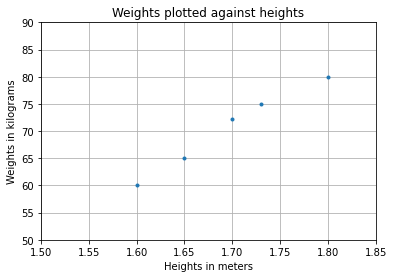

In [3]:
# plot the dots
plt.plot(heights, weights, '.')

plt.grid(True)
plt.title('Weights plotted against heights')
plt.xlabel('Heights in meters')
plt.ylabel('Weights in kilograms')
plt.axis([1.5, 1.85, 50, 90])

plt.show()

## 2. Making Predictions

In [4]:
# Create and fit the model
model = LinearRegression()
model.fit(X=heights, y=weights)

LinearRegression()

In [10]:
model.predict([[1.75]]) # use this model to predict the weight when given the height. 

array([[76.03876501]])

In [11]:
# make prediction of new data
weight = model.predict([[1.75]])[0][0]
print(round(weight,2))

76.04


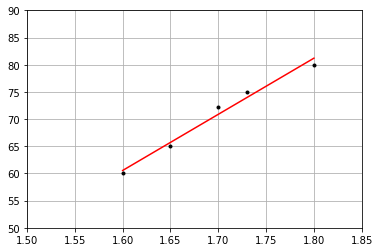

In [12]:
# Plotting the Linear Regression Line
plt.axis([1.5, 1.85, 50, 90])
plt.grid(True)
plt.plot(heights, weights, 'k.')
plt.plot(heights, model.predict(heights), color='r')

In [13]:
# Getting the Intercept of the Linear Regression Line
print(round(model.intercept_[0],2))

-104.75


In [14]:
# The slope of the Linear Regression Line
print(round(model.coef_[0][0],2))

103.31


## 3. Examining the Performance of the Model by Calculating the Residual Sum of Squares

In [17]:
# RSS
import numpy as np
print('Residual sum of squares: %.2f' % np.sum((weights - model.predict(heights)) ** 2)) 

Residual sum of squares: 5.34


In [18]:
# R-sq
print('R-squared: %.4f' % model.score(heights, weights))  

R-squared: 0.9790


In [24]:
# Using test data to calculate r-squared
heights_test = [[1.58], [1.62], [1.69], [1.76], [1.82]]
weights_test = [[58], [63], [72], [73], [85]]

print('R-squared: %.4f' % model.score(heights_test, weights_test))

# The value of R-sq is always between 0 (0%) and 1 (100%). The bigger the better.


R-squared: 0.9429


# Multiple Regression

## 1. Preparing the Boston Dataset to Predict Housing Price

In [25]:
# load libraries and the dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
dataset = load_boston()

/Users/yzhang/opt/anaconda3/envs/Python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [28]:
print(dataset.data) #The data is a two-dimensional array

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [29]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
print(dataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [31]:
#Load the data into Pandas DataFrame
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
# Add the prices of houses to the DataFrame.
df['price']=dataset.target

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
print(df.isnull().sum()) # check if there is any missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64


# Feature Selection
Using corr( ) function to find the variables that have high correlation with the price

In [34]:
print(df.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [40]:
print(df.corr().iloc[:, -1])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
price      1.000000
Name: price, dtype: float64


# Multiple Regression

With the corr() function, we found that the price has a positive correlation with 'RM' and a negative correlation with 'LSTAT'.

Text(0, 0.5, 'price')

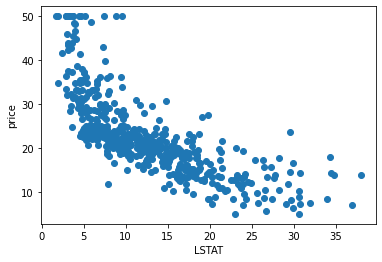

In [41]:
# Plot a scatter plot showing the relationship between the LSTAT feature and the price
plt.scatter(df['LSTAT'], df['price'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('price')

Text(0, 0.5, 'price')

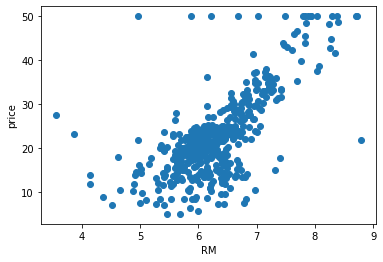

In [42]:
plt.scatter(df['RM'], df['price'], marker='o')
plt.xlabel('RM')
plt.ylabel('price')

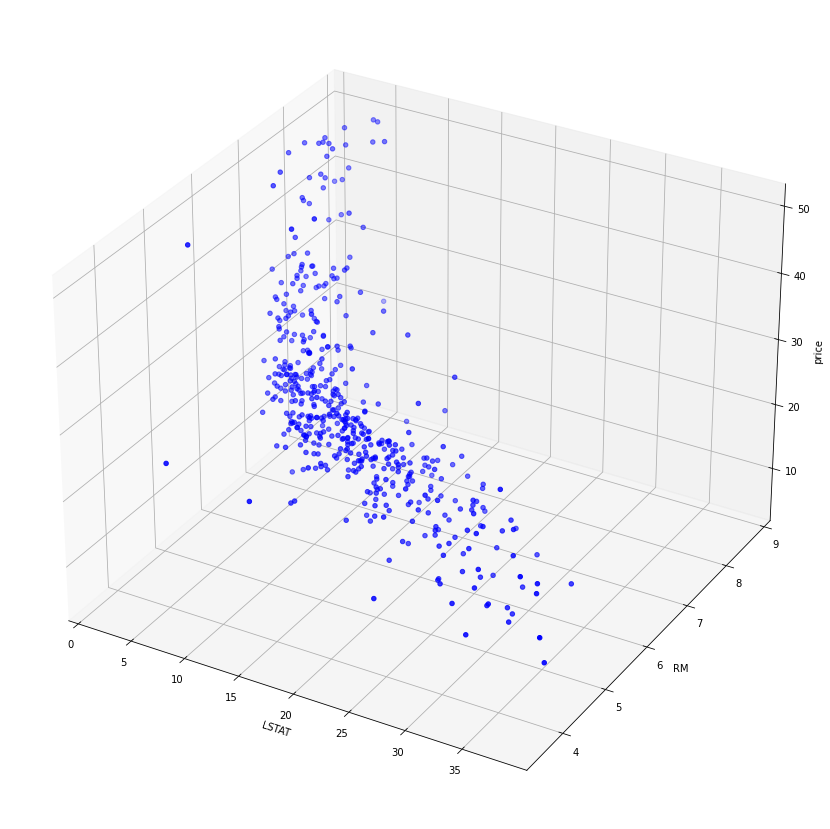

In [65]:
# plot both two features on a 3D chart
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['LSTAT'],
df['RM'],
df['price'],
c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("price")
plt.show()

# Training the model

In [46]:
# split the dataset into 70 percent for training and 30 percent for testing
# x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
x = df.loc[:, ['LSTAT', 'RM']]
y = df['price']
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

In [47]:
# check the shape of the training data and testing data
print(x_train.shape)
print(Y_train.shape)

(354, 2)
(354,)


In [49]:
print(x_test.shape)
print(Y_test.shape)

(152, 2)
(152,)


In [51]:
# build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [72]:
print('R-squared: %.4f' % model.score(x_test, Y_test))

R-squared: 0.6162


# Getting the Intercept and Coefficients

In [73]:
print(model.intercept_)
print(model.coef_)

0.38437936780346504
[-0.65957972  4.83197581]


In [74]:
# The equation for the relationship between Y and x1 and x2 should be
# Y = 0.3843793678034899 + (-0.65957972)x1+ 4.83197581x2
# Now we use the model to predict the house price when LSTAT is 30 and RM is 5
print(model.predict([[30,5]]))

[4.75686695]


/Users/yzhang/opt/anaconda3/envs/Python3/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Polynomial Regression

In [53]:
# Create the DataFrame
x=[[1.5], [2], [3],[4],[5],[6]]
y=[[1.5],[2.5],[4],[4.3],[4.5],[5]]

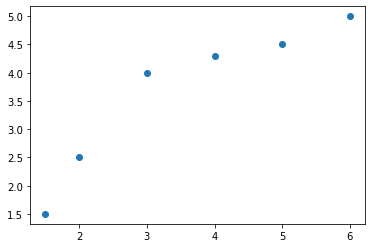

In [54]:
plt.scatter(x,y)

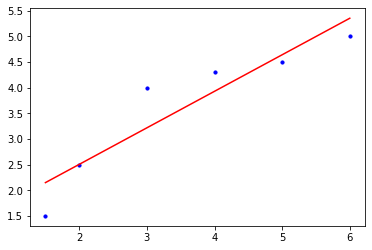

In [55]:
model = LinearRegression()
model.fit(x,y)

#---perform prediction---
y_pred = model.predict(x)

#---plot the training points---
plt.scatter(x, y, s=10, color='b')

#---plot the straight line---
plt.plot(x, y_pred, color='r')
plt.show()

In [84]:
#---calculate R-Squared---
print('R-Squared for training set: %.4f' % model.score(x,y))

R-Squared for training set: 0.8543


# Polynomial Function of Degree 2

In [56]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(x) # This generate a new feature matrix consisting of values, 1, x, x^2

In [57]:
# Build the model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

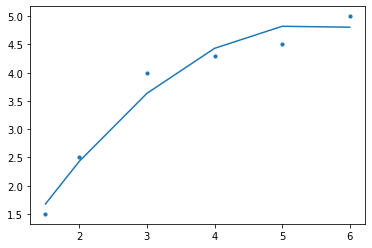

In [58]:
#---plot the points---
plt.scatter(x, y, s=10)
#---plot the regression line---
plt.plot(x, y_poly_pred)
plt.show()

In [59]:
print(model.intercept_)
print(model.coef_)

[-1.19785039]
[[ 0.          2.22076526 -0.2033534 ]]


In [60]:
# Evaluate the model by calculating the R-squared value.
print('R-Squared for training set: %.4f' % model.score(x_poly,y))

R-Squared for training set: 0.9637
